In [77]:
import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16, 10]

df = pd.read_csv("../data/iot-aqm.continuousdata.csv")
df = df.drop(["_id", "data.0.status", "data.0.unit", "data.1.index", "data.1.status", "data.1.unit",
              "data.1.value", "data.2.index", "data.2.status", "data.2.unit", "data.2.value",
              "data.3.status", "data.3.unit", "data.4.status", "data.4.unit", "data.5.status",
              "data.5.unit", "data.6.index", "data.6.status", "data.6.unit", "data.6.value",
              "node", "oganizationCode"], axis=1)

even_df = df.iloc[::2]
even_df = even_df.reset_index()
even_df = even_df.drop(["index", "data.0.index", "data.0.value", "data.3.index", "data.3.value"], axis=1)

odd_df = df.iloc[1::2]
odd_df = odd_df.reset_index()
odd_df = odd_df.drop(["index", "time"], axis=1)

df = pd.concat([odd_df, even_df], axis=1, sort=False)
columns = ["col1", "CO2", "col2", "TEMP", "col3", "HUM", "col4", "LIGHT", "col5", "PM25", "col6", "PM10", "time"]
df.columns = columns

df = df.drop(["col1", "col2", "col3", "col4", "col5", "col6"], axis=1)
df = df.dropna()
df = df.drop(df[df.TEMP > 50].index)
df = df.drop(df[df.HUM > 100].index)
df = df.drop(df[df.CO2 > 1000].index)
df = df.drop(df[df.LIGHT > 800].index)
df = df.drop(df[df.PM25 > 200].index)
df = df.drop(df[df.PM10 > 200].index)

df['time'] = pd.to_datetime(df['time'])
df['time'] += datetime.timedelta(hours=7)

times = pd.DatetimeIndex(df.time)
df = df.groupby([times.year, times.month, times.day, times.dayofweek, times.hour]).mean()
df.index.names = ["Year", "Month", "Day", "Weekend", "Hour"]

In [78]:
df.describe()

CO2         TEMP          HUM        LIGHT         PM25  \
count  6433.000000  6433.000000  6433.000000  6433.000000  6433.000000   
mean    345.297009    22.298434    48.080919     9.664736    64.358800   
std     259.399705     4.136751    22.570767    15.567205    34.347486   
min       5.116667     0.900000     1.350000     0.000000     1.896429   
25%      14.300000    18.500000    32.293902     0.000000    35.879762   
50%     541.858824    23.772840    38.744048     0.059524    54.327381   
75%     552.769231    25.172289    59.315476    17.286905    88.553659   
max     687.000000    31.069412    99.200000   179.142857   192.880000   

              PM10  
count  6433.000000  
mean     18.172797  
std      19.333973  
min       0.000000  
25%       0.000000  
50%      13.830952  
75%      30.926190  
max     162.964286

<Axes: xlabel='Year,Month,Day,Weekend,Hour'>

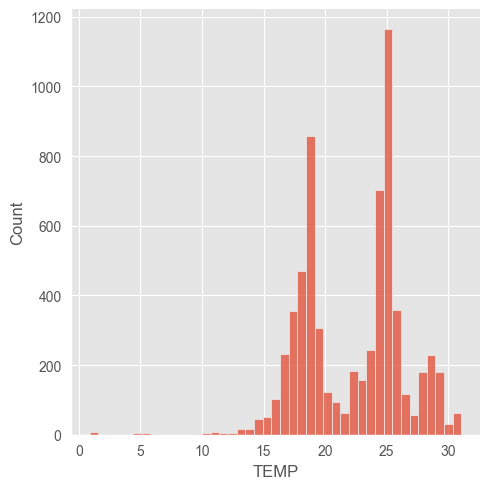

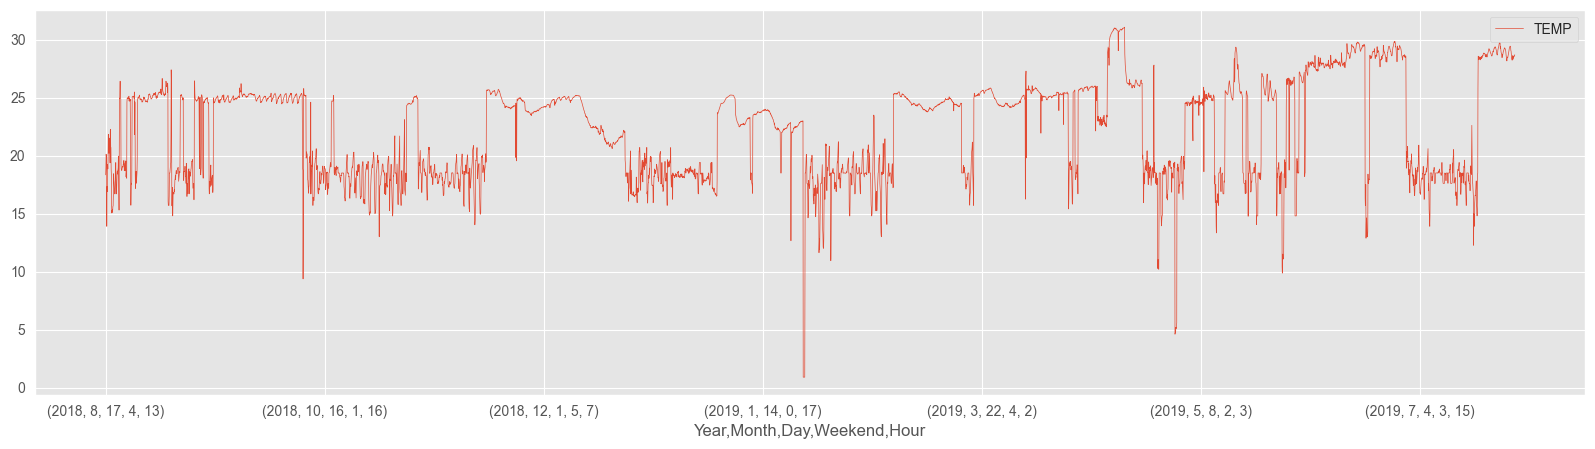

In [79]:
sns.displot(df["TEMP"]).set_titles("TEMP Histogram")
df[["TEMP"]].plot(linewidth=0.5, figsize=(20, 5))

<Axes: xlabel='Year,Month,Day,Weekend,Hour'>

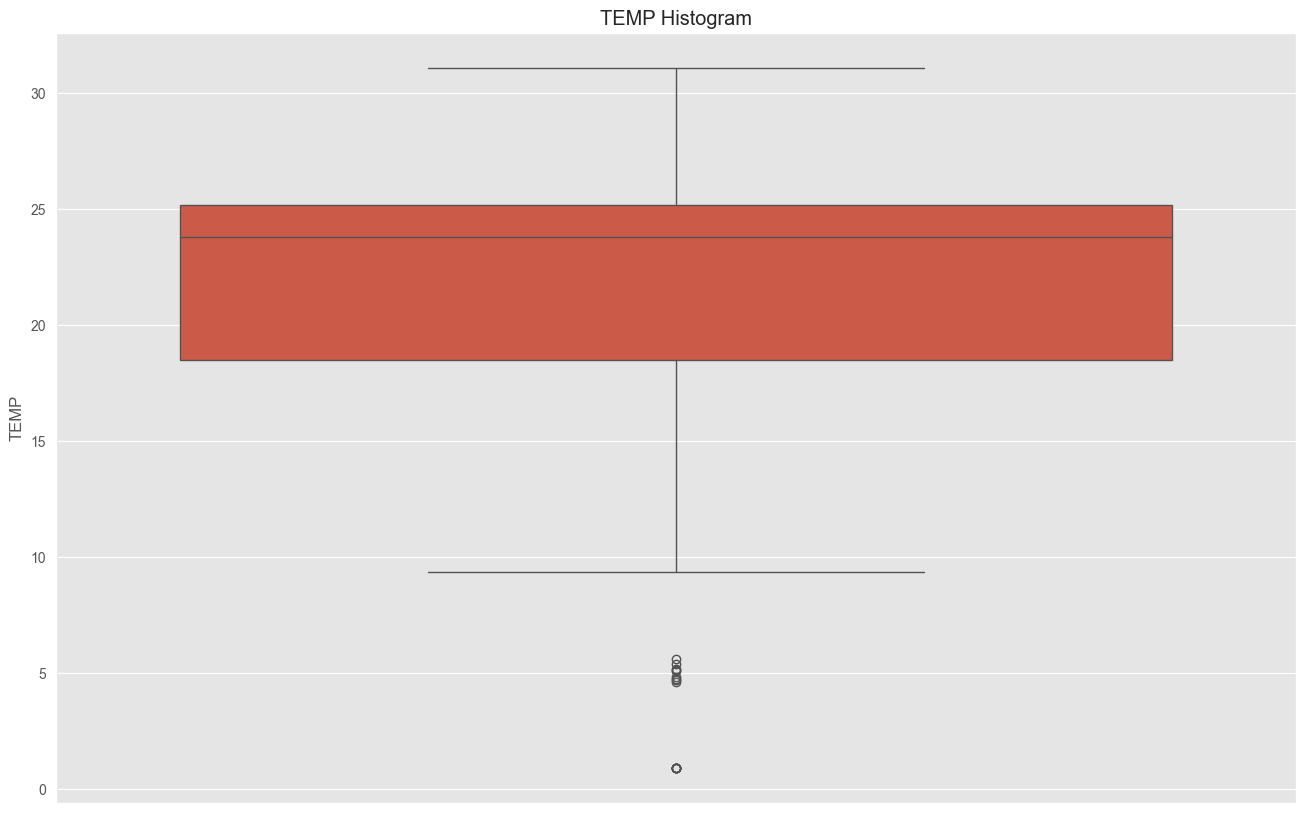

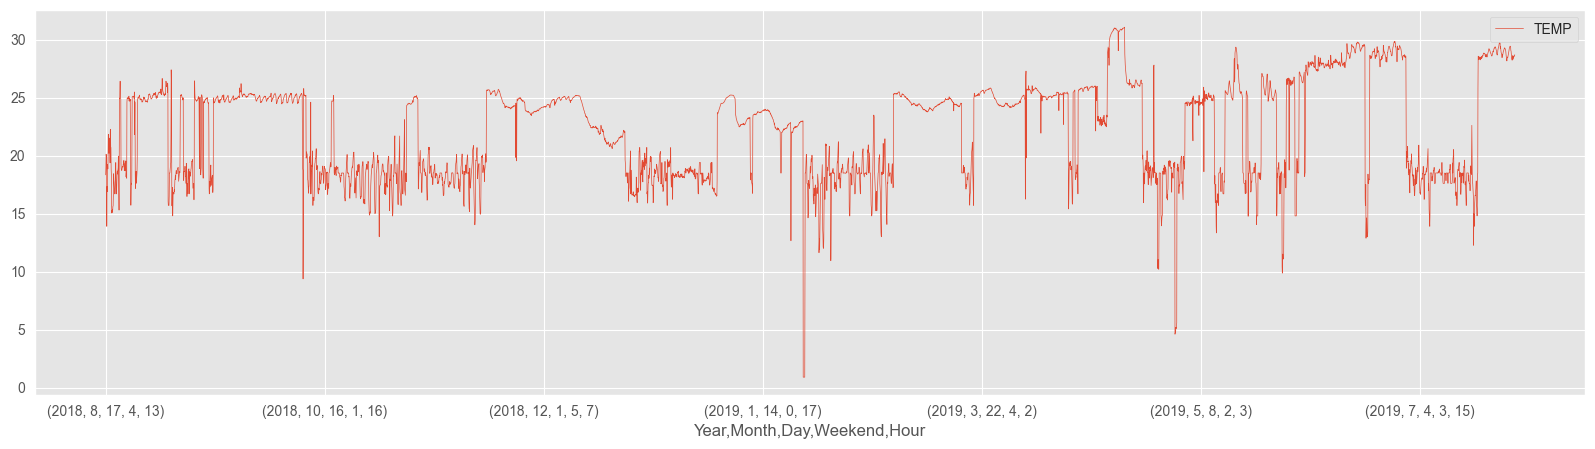

In [80]:
sns.boxplot(df["TEMP"]).set_title("TEMP Histogram")
df[["TEMP"]].plot(linewidth=0.5, figsize=(20, 5))

<Axes: xlabel='Year,Month,Day,Weekend,Hour'>

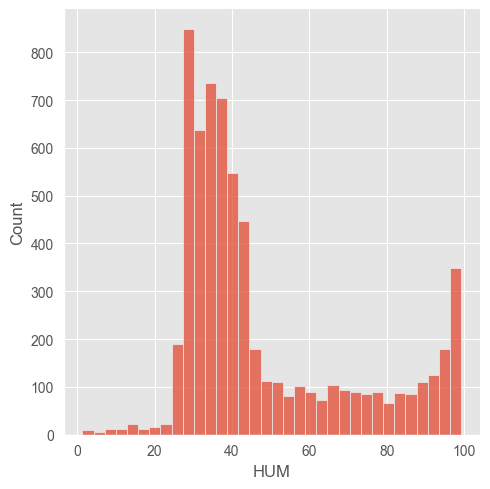

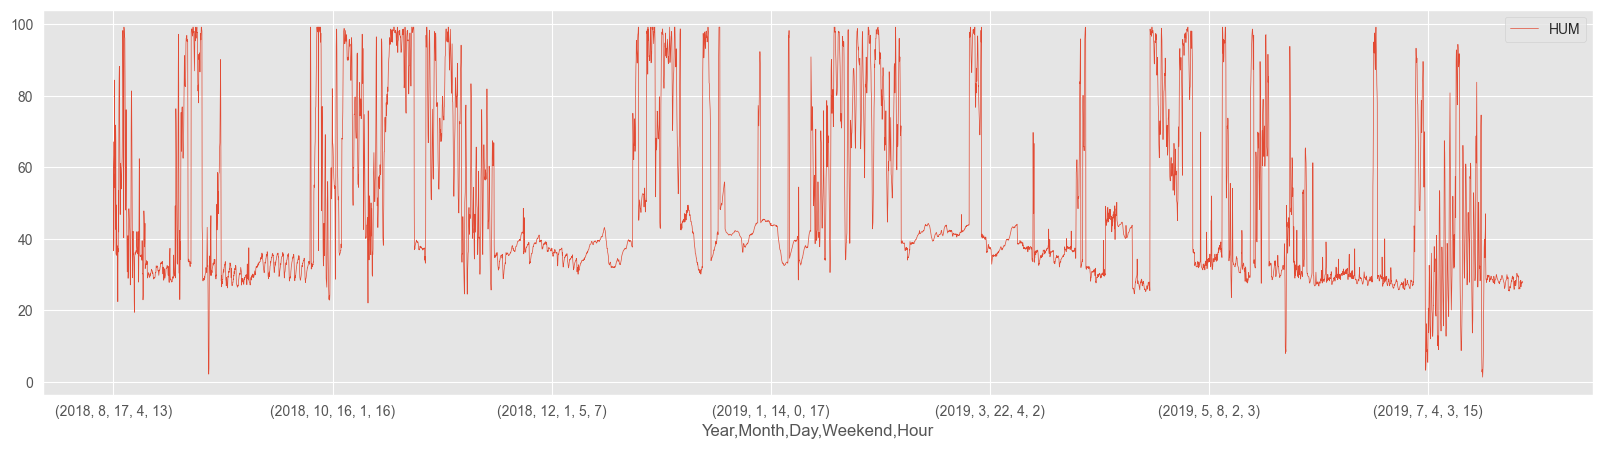

In [81]:
sns.displot(df["HUM"]).set_titles("HUM histogram")
df[["HUM"]].plot(linewidth=0.5, figsize=(20, 5))

<Axes: xlabel='Year,Month,Day,Weekend,Hour'>

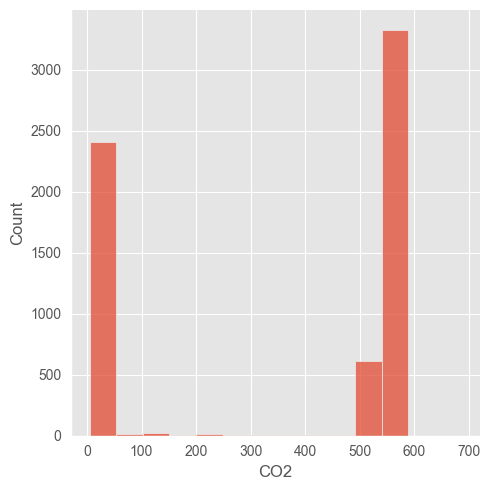

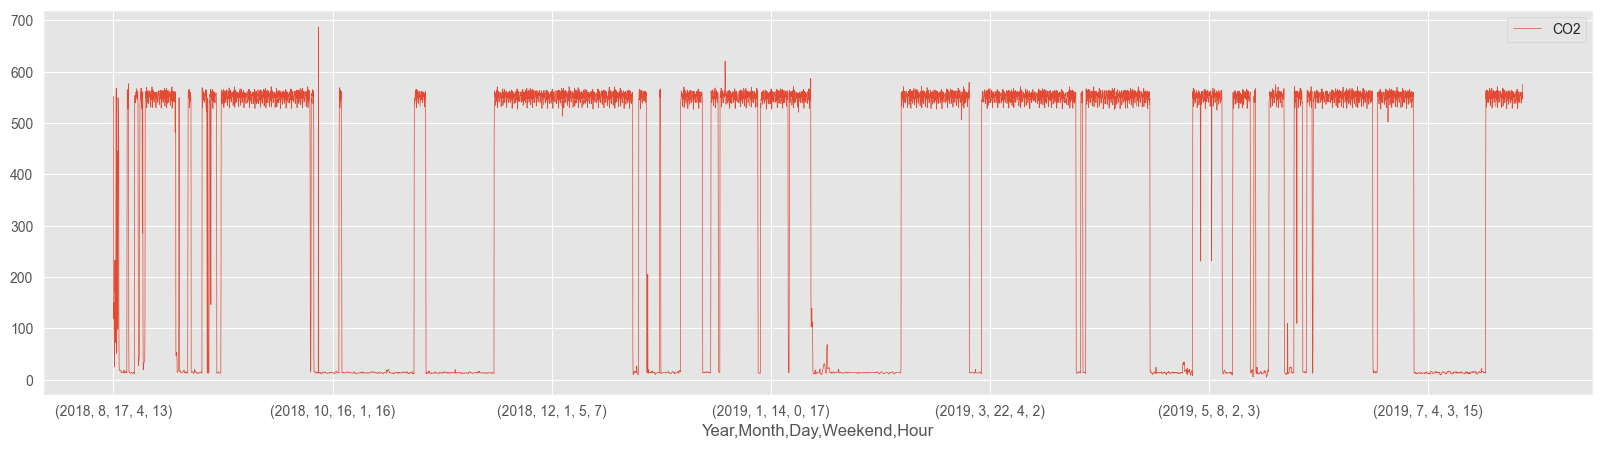

In [82]:
sns.displot(df["CO2"]).set_titles("CO2 histogram")
df[["CO2"]].plot(linewidth=0.5, figsize=(20, 5))

<Axes: xlabel='Year,Month,Day,Weekend,Hour'>

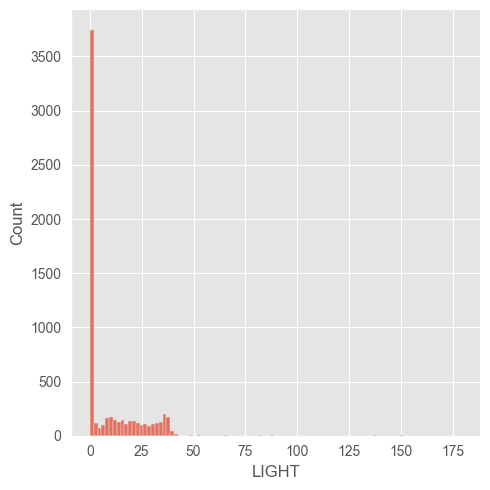

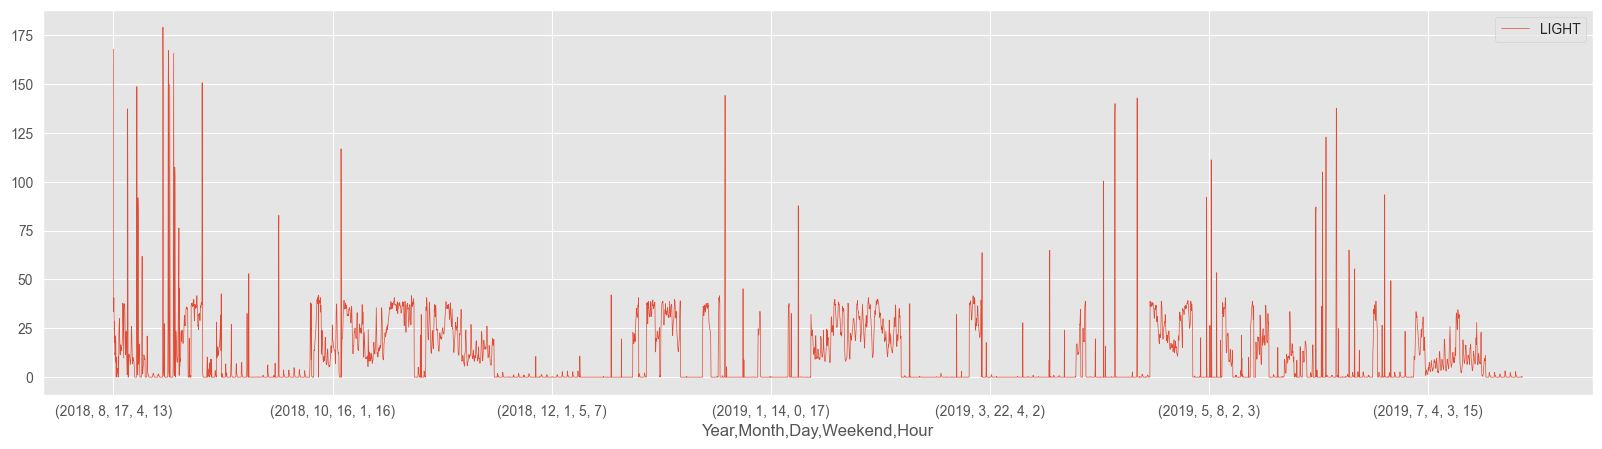

In [83]:
sns.displot(df["LIGHT"]).set_titles("LIGHT histogram")
df[["LIGHT"]].plot(linewidth=0.5, figsize=(20, 5))

<Axes: xlabel='Year,Month,Day,Weekend,Hour'>

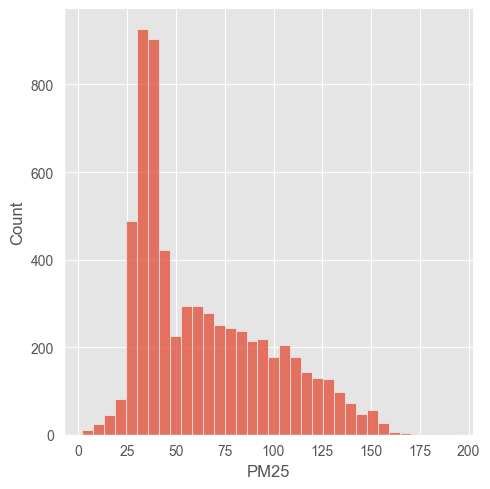

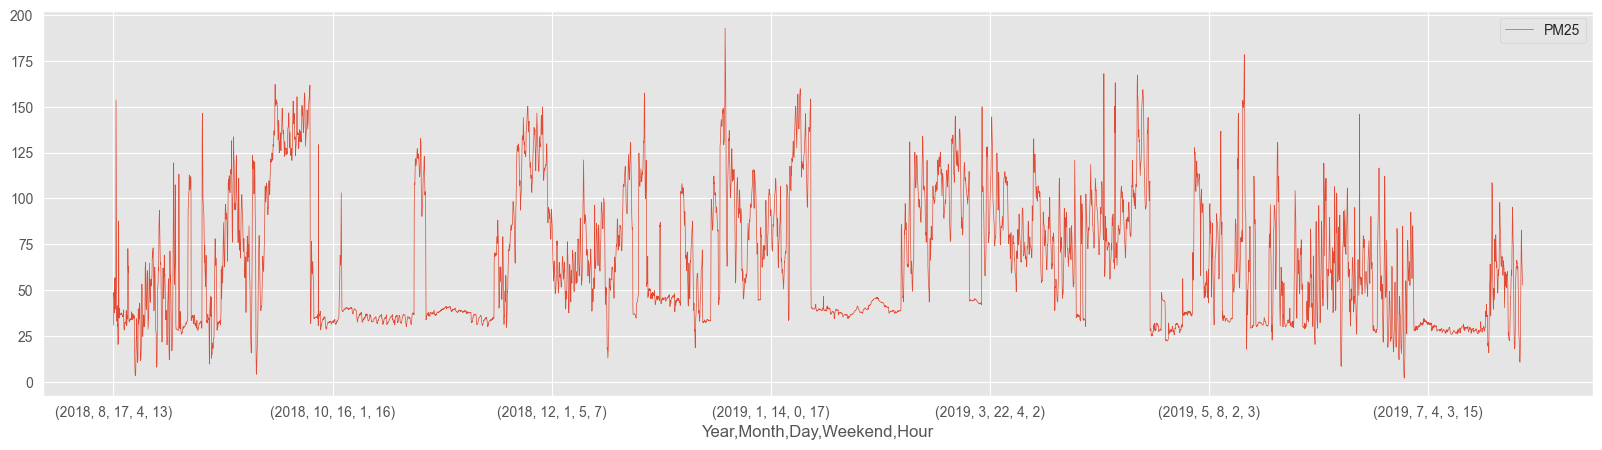

In [84]:
sns.displot(df["PM25"]).set_titles("PM25 histogram")
df[["PM25"]].plot(linewidth=0.5, figsize=(20, 5))

<Axes: xlabel='Year,Month,Day,Weekend,Hour'>

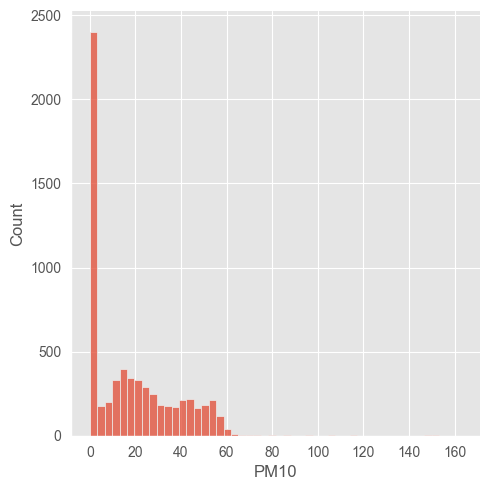

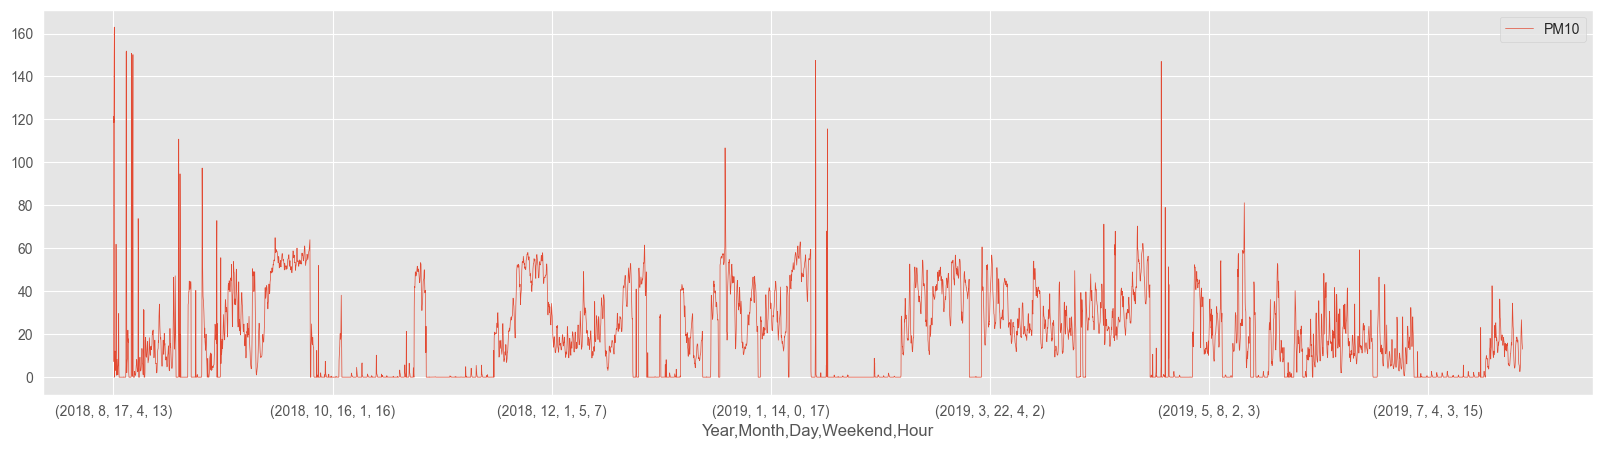

In [85]:
sns.displot(df["PM10"]).set_titles("PM10 histogram")
df[["PM10"]].plot(linewidth=0.5, figsize=(20, 5))

<Axes: xlabel='Year,Month,Day,Weekend,Hour'>

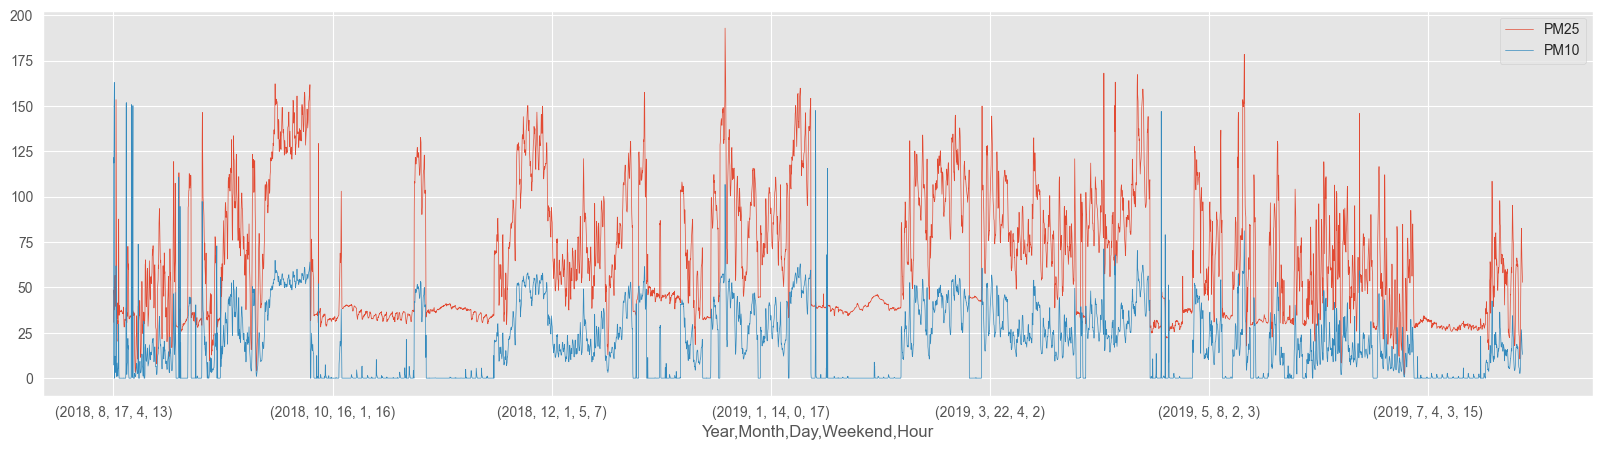

In [86]:
df[["PM25", "PM10"]].plot(linewidth=0.5, figsize=(20, 5))

In [87]:
times = pd.date_range(start='2018-08-16', end='2019-07-24', freq='H').tz_localize('utc')
df2 = pd.DataFrame(data={'Value': np.zeros(times.size)}, index=times)
df2 = df2.groupby([times.year, times.month, times.day, times.dayofweek, times.hour]).mean()
df2.index.names = ["Year", "Month", "Day", "Weekend", "Hour"]
df = pd.merge(df, df2, how='outer', left_index=True, right_index=True)
df = df.drop(["Value"], axis=1)
df.head(50)

CO2       TEMP        HUM       LIGHT  \
Year Month Day Weekend Hour                                                 
2018 8     16  3       0            NaN        NaN        NaN         NaN   
                       1            NaN        NaN        NaN         NaN   
                       2            NaN        NaN        NaN         NaN   
                       3            NaN        NaN        NaN         NaN   
                       4            NaN        NaN        NaN         NaN   
                       5            NaN        NaN        NaN         NaN   
                       6            NaN        NaN        NaN         NaN   
                       7            NaN        NaN        NaN         NaN   
                       8            NaN        NaN        NaN         NaN   
                       9            NaN        NaN        NaN         NaN   
                       10           NaN        NaN        NaN         NaN   
                       11           NaN        NaN        NaN         NaN   
                       12           NaN        NaN        NaN         NaN   
                       13           NaN        NaN        NaN         NaN   
                       14           NaN        NaN        NaN         NaN   
                       15           NaN        NaN        NaN         NaN   
                       16           NaN        NaN        NaN         NaN   
                       17           NaN        NaN        NaN         NaN   
                       18           NaN        NaN        NaN         NaN   
                       19           NaN        NaN        NaN         NaN   
                       20           NaN        NaN        NaN         NaN   
                       21           NaN        NaN        NaN         NaN   
                       22           NaN        NaN        NaN         NaN   
                       23           NaN        NaN        NaN         NaN   
           17  4       0            NaN        NaN        NaN         NaN   
                       1            NaN        NaN        NaN         NaN   
                       2            NaN        NaN        NaN         NaN   
                       3            NaN        NaN        NaN         NaN   
                       4            NaN        NaN        NaN         NaN   
                       5            NaN        NaN        NaN         NaN   
                       6            NaN        NaN        NaN         NaN   
                       7            NaN        NaN        NaN         NaN   
                       8            NaN        NaN        NaN         NaN   
                       9            NaN        NaN        NaN         NaN   
                       10           NaN        NaN        NaN         NaN   
                       11           NaN        NaN        NaN         NaN   
                       12           NaN        NaN        NaN         NaN   
                       13    552.687500  18.337500  67.125000  167.937500   
                       14    119.334568  18.950617  36.670370   33.537037   
                       15    150.747826  20.117391  38.943478   40.586957   
                       16     98.475385  19.944615  60.456923   31.156923   
                       17     52.914286  19.919048  63.425000   17.551190   
                       18           NaN        NaN        NaN         NaN   
                       19           NaN        NaN        NaN         NaN   
                       20           NaN        NaN        NaN         NaN   
                       21           NaN        NaN        NaN         NaN   
                       22           NaN        NaN        NaN         NaN   
                       23           NaN        NaN        NaN         NaN   
           18  5       0            NaN        NaN        NaN         NaN   
                       1            NaN        NaN        NaN         NaN   

                               

In [88]:
df.index = df.index.droplevel(0)
df.index = df.index.droplevel(1)

PM25_cols = []
TEMP_cols = []
HUM_cols = []

for i in range(1, 25):
    col = 'PM25P' + str(i)
    PM25_cols.append(col)
    df[col] = df['PM25'].shift(periods=i)
    
    col = 'TEMPP' + str(i)
    TEMP_cols.append(col)
    df[col] = df['TEMP'].shift(periods=i)
    
    col = 'HUMP' + str(i)
    HUM_cols.append(col)
    df[col] = df['HUM'].shift(periods=i)
    
df["MAXPM25"] = df[PM25_cols].max(axis=1)
df["MINPM25"] = df[PM25_cols].min(axis=1)
df["AVGPM25"] = df[PM25_cols].mean(axis=1)

df["MAXTEMP"] = df[TEMP_cols].max(axis=1)
df["MINTEMP"] = df[TEMP_cols].min(axis=1)
df["AVGTEMP"] = df[TEMP_cols].mean(axis=1)

df["MAXHUM"] = df[HUM_cols].max(axis=1)
df["MINHUM"] = df[HUM_cols].min(axis=1)
df["AVGHUM"] = df[HUM_cols].mean(axis=1)

# df = df.drop(TEMP_cols, axis=1)
# df = df.drop(HUM_cols, axis=1)
# df = df.drop(PM25_cols, axis=1)
# df = df.drop("PM10", axis=1)

df['Label'] = df['PM25'].shift(periods=-1)

In [89]:
df = df.dropna(axis=0)
df.describe()

CO2         TEMP          HUM        LIGHT         PM25  \
count  5084.000000  5084.000000  5084.000000  5084.000000  5084.000000   
mean    382.554636    22.894634    43.463060     7.122155    66.058012   
std     247.969641     3.933832    18.928631    13.892019    33.917058   
min       9.150000    11.626829     1.350000     0.000000     1.896429   
25%      14.740833    18.714286    31.307002     0.000000    36.501786   
50%     544.312446    24.342605    37.128424     0.000000    59.882738   
75%     554.750000    25.283382    45.105952    10.499408    90.375000   
max     571.282353    31.069412    99.200000   179.142857   168.085106   

              PM10       PM25P1       TEMPP1        HUMP1       PM25P2  ...  \
count  5084.000000  5084.000000  5084.000000  5084.000000  5084.000000  ...   
mean     19.331115    66.036704    22.896045    43.403363    66.020628  ...   
std      18.236873    33.872361     3.931503    18.833622    33.837508  ...   
min       0.000000     1.896429    11.626829     1.350000     1.896429  ...   
25%       0.048193    36.513095    18.714286    31.299716    36.521131  ...   
50%      16.220728    59.875000    24.344048    37.121898    59.840476  ...   
75%      31.906548    90.388697    25.283778    45.105952    90.375000  ...   
max     150.750000   168.085106    31.069412    99.200000   168.085106  ...   

           MAXPM25      MINPM25      AVGPM25      MAXTEMP      MINTEMP  \
count  5084.000000  5084.000000  5084.000000  5084.000000  5084.000000   
mean     88.120902    47.676380    65.586328    24.117024    21.245374   
std      38.131760    27.459344    30.226801     3.308632     4.723896   
min      27.970238     1.896429    21.490932    18.145122     0.900000   
25%      46.435526    29.564286    39.039603    20.717647    16.815000   
50%      91.620833    38.636905    60.070945    25.038095    22.591667   
75%     115.698824    62.175000    86.055813    25.739286    24.759226   
max     182.945455   131.864286   144.755816    31.069412    30.751807   

           AVGTEMP       MAXHUM       MINHUM       AVGHUM        Label  
count  5084.000000  5084.000000  5084.000000  5084.000000  5084.000000  
mean     22.894519    55.255445    34.362953    43.365668    66.092284  
std       3.679807    24.283484    12.598352    16.133431    33.968882  
min      12.011455    27.808333     1.350000    13.964514     1.896429  
25%      18.508604    36.157143    27.676190    32.416853    36.484154  
50%      24.149824    42.476471    32.158824    38.053075    59.875000  
75%      25.165474    77.706250    38.747619    47.143852    90.375000  
max      30.895977    99.200000    90.613095    95.907597   168.085106  

[8 rows x 88 columns]

In [90]:
columns = df.index.names
columns = np.append(columns, df.columns.values[:-1])
date_time_values = np.asmatrix([list(item) for item in df.index.values])
data = np.append(date_time_values, df.to_numpy(), axis=1)
data[:, 1] = np.where(data[:, 1] < 5, 0, 1)

bin_season = np.where(data[:, 0] <= 3, [0, 0], np.where(data[:, 0] <= 6, [0, 1], np.where(data[:, 0] <= 9, [1, 0], np.where(data[:, 0] <= 12, [1, 1], 0))))
data = np.delete(data, 0, 1)
data = np.append(bin_season, data, axis=1)

data

matrix([[1, 0, 0, ..., 28.98095238095238, 55.32626913362455,
         33.03333333333334],
        [1, 0, 0, ..., 28.98095238095238, 53.0786500860055,
         33.81428571428572],
        [1, 0, 0, ..., 28.98095238095238, 50.85351250738915,
         34.30361445783132],
        ...,
        [1, 0, 0, ..., 25.95952380952381, 28.120126936316694,
         60.171428571428564],
        [1, 0, 0, ..., 25.95952380952381, 28.077617015681778,
         56.721428571428575],
        [1, 0, 0, ..., 25.95952380952381, 27.965513841078604,
         52.800000000000004]], dtype=object)

In [93]:
np.savetxt("../processed_data/TCM_TK_TH_season.csv", data, delimiter=",", fmt="%s")
